In [ ]:
import sys

sys.path.append("..")

In [ ]:
import json

In [3]:
from source.Prediction import makePrediction, makeAllPredictions
from source.Visualisation import totalNumberOfItems, itemsInClasses, classesDistribution, getSentence, getIntent, computeMetrics, globalConfusionMatrix

# Exemple avec une phrase

In [4]:
# Test using sample sentence
sentence = "Je voudrais manger au restaurant ce soir"
  
# Making request
data = makePrediction(sentence)

# Printing the output 
print("Results :\n", data) 

Results :
 {'find-train': 0.003149856347590685, 'irrelevant': 0.16539081931114197, 'find-flight': 0.0028878021985292435, 'find-restaurant': 0.7818630337715149, 'purchase': 0.010286014527082443, 'find-around-me': 0.003812880488112569, 'provide-showtimes': 0.02780276909470558, 'find-hotel': 0.004806765355169773}


# Format de réponse

Il existe 8 catégories différentes pour la classifications des intentions dans le modèle proposé :
- find-train : Trouver un train
- irrelevant : Non pertinent
- find-flight : Trouver un vol
- find-restaurant : Trouver un restaurant
- purchase : Trouver des renseignements concernant un achat (prix, disponibilité, etc...) ou Trouver un article 
- find-around-me : Trouver un lieu faisant une activité autour de soi (ou d'une zone donnée dans la requête)
- provide-showtimes : Trouver des informations pour un film
- find-hotel : Trouver un hotel

# Lecture des données

In [5]:
# Reading training data
with open('../data/processed/training_set.json') as f:
  trainingData = json.load(f)

with open('../data/processed/testing_set.json') as f:
  testingData = json.load(f)

# Sentence example
print(trainingData[0])

{'intent': 'irrelevant', 'sentence': '850€ maximum pour le loyer, à partir de janvier si possible'}


# Visualisation des données d'entraînement

Total number of items :  6035
Item for each intent :
 {'find-train': 143, 'find-flight': 142, 'find-restaurant': 469, 'purchase': 613, 'find-around-me': 383, 'provide-showtimes': 117, 'find-hotel': 316, 'irrelevant': 3852}


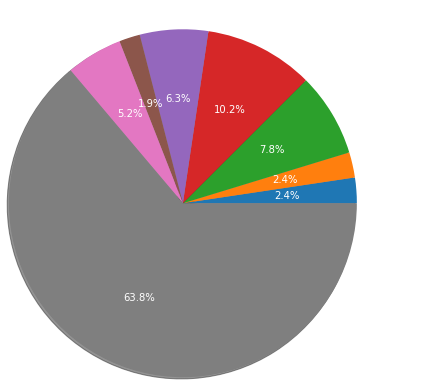

In [6]:
print("Total number of items : ", totalNumberOfItems(trainingData))

classes = itemsInClasses(trainingData)
print("Item for each intent :\n", classes)

#Distribution plot
classesDistribution(trainingData, classes)

On peut voir sur le graphique ci-dessus que les intentions ne sont pas du tout correctement distribués dans le training data. Par conséquent le modèle entraîné va être biaisé et ne fonctionnera pas optimalement.

# Visualisation des données de test

Total number of items :  1065
Item for each intent :
 {'find-train': 21, 'find-flight': 24, 'find-restaurant': 93, 'purchase': 114, 'find-around-me': 67, 'provide-showtimes': 14, 'find-hotel': 55, 'irrelevant': 677}


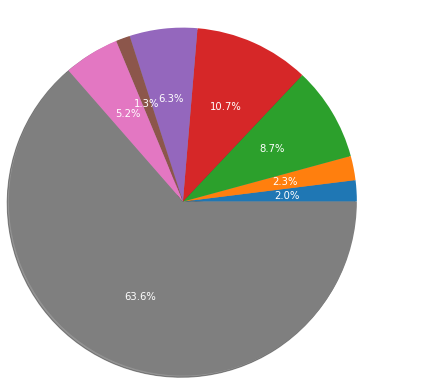

In [7]:
print("Total number of items : ", totalNumberOfItems(testingData))

classes = itemsInClasses(testingData)
print("Item for each intent :\n", classes)

#Distribution plot
classesDistribution(testingData, classes)

On peut voir ci-dessus que les données de test sont aussi mal distribuées que les données d'entraînement

# Métrique du modèle

Nous allons ici calculer la précision, le rappel et le score f1 à l'aide des données de test

In [8]:
# Getting sentences and intents
testSentence = getSentence(testingData)
testIntent = getIntent(testingData)

In [9]:
# Making predictions
resultsMax = makeAllPredictions(testSentence)

In [10]:
# Computing precision, recall and f1
precision, recall, f1 = computeMetrics(testIntent, resultsMax)

print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)

Precision: 0.816473
Recall: 0.804695
F1 score: 0.783963


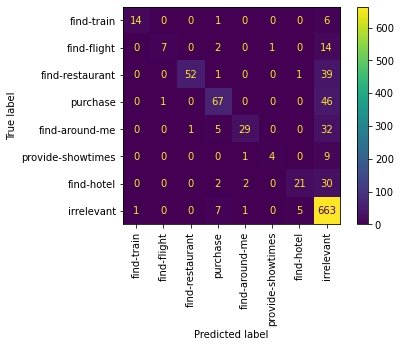

In [11]:
#Confusion matrix for each label
#print(multilabel_confusion_matrix(testLabel, resultsMax))
#PEUT ETRE METTRE PLUS PROPRE OU ENLEVER

#Global confusion matrix
globalConfusionMatrix(testIntent, resultsMax)